###ANSWER
(for making sure this gets removed)

### INSTRUCTOR CONTENT -- REMOVE THIS IN STUDENT VERSION
#### The goals this PCA are:

* Introduce ideas for how one can still use an SVM to separate data that, at first glance, does not appear to be linearly separable.
* Have students thinking about how they can transform 2D data into 3D data to make this possible.
* Touch briefly on the concept of non-linear kernels as well.

# Pre-Class Assignment: Further exploration of SVMs
# Day 21
# CMSE 202


## <p style="text-align: right;"> &#9989; Put your name here</p>

## Goals for today's pre-class assignment


1. Observing non-linear separability (`sklearn.datasets.make_circles`)
1. Graphing data in 3D
1. Explaining how a RBF kernel works like a nearest neighbors model

<img src="https://sebastianraschka.com/images/blog/2014/kernel_pca/2014-09-14-kernel_pca_72_0.png">


## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder in the Desire2Learn website. 

### Imports:

In [1]:
# imports for the day
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

---
## 1. Nonlinear data

Working with linearly separable data certainly makes life easy, but that is simply not the case many times when we're working with data. Review data in the figure at the beginning of the assignment. Clearly the data in that plot are not linearly separable. It turns out, we can find a way to make it linearly separable and we will explore this during class.

### 1.1 `sklearn.datasets.make_circles` data generators

Sticking with the  <a href="https://scikit-learn.org/stable/datasets.html"> scikit-learn datasets page </a> and in particuar <a href="https://scikit-learn.org/stable/datasets/sample_generators.html">Section 7.3</a>, we see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html">`make_circles`</a> which allows us to make data similar to that seen in the figure above.

Using the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), create an example data set with two "circles", a 2-class data set. It should:
- have 100 samples
- two classes
- set the `random_state` value so that you can generate the same "circles" every time.

In [ ]:
# put your answer here


In [3]:
### ANSWER ###

X,y = make_circles(n_samples = 100, random_state = 3)

---
## 2. Graph the circles

Did it work? As always, it's hard to tell if we ended up with what we wanted without visualizing it.

&#9989; **Do This:** Graph the result of the `make_circles` operation. Color all the elements of one class one color and the elements of the other class the other color. 

As a reminder:
- you can create a list/array with color assignments for each data element based on their class. Your colors can be strings like `'red'`, integer numbers (that will map to whatever matplotlib `cmap` you use), or hex code values -- it's up to you.
- try playing with the `random_state` value and see if you can get some "blobs" that are relatively "close" to each other. It should be the case that if you use the same `random_state` value each time that you get the same distribution of data. Remember, "random" means "relatively random" here. That is, predicting the next value in a sequence should be (statistically speaking) random. However, start with the same seed value (which is what `random_state` is for this process) you get the exact same sequence.

In [ ]:
# put your answer here


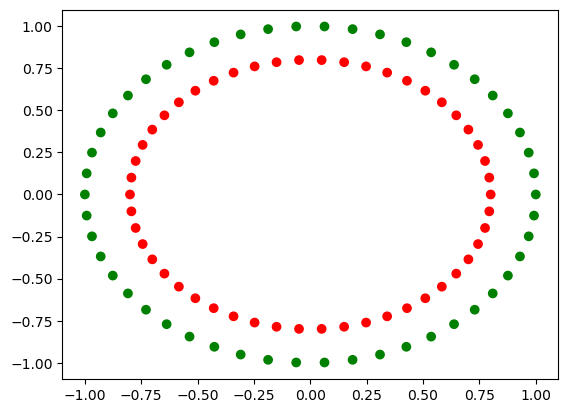

In [5]:
### ANSWER ###

clrs = ['red' if cls == 1 else 'green' for cls in y]
plt.scatter(X[:,0], X[:,1], c=clrs)#, cmap="viridis")

---
## 3. Adding a dimension to linearly separate the data

It's hard to see how we could separate these two classes given their overlap/shape, and that is likely true in the 2D format we are looking at currently. But what if we added a 3rd dimension based on the features of the data that we have? That is, can we use the existing X and Y values to make a new dimension that would that help to linearly separate the data?

*As you saw in [this video](https://www.youtube.com/watch?v=efR1C6CvhmE) from the previous pre-class assignment, creating these new dimensions from the data is part of what an SVM does. For this assignment, we will try to do this manually.*

First, let remind ourselves of 3D plots.

### 3.1 Making a 3D scatter plot

To setup a 3D scatter plot, you need the following steps (found in this <a href="https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#scatter-plots">tutorial</a>; you can see the code if you click on the plot). We can generate some random values and try it out.

Text(0.5, 0.92, 'simple 3D scatter plot')

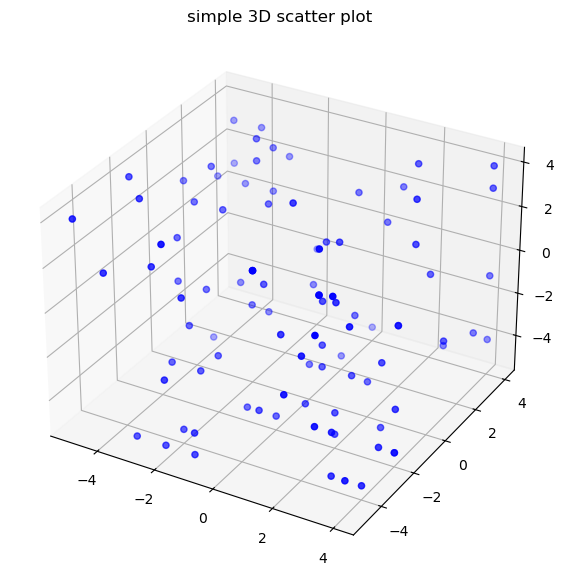

In [7]:
x = np.random.randint(-5, 5, 100)
y = np.random.randint(-5, 5, 100)
z = np.random.randint(-5, 5, 100)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
plt.title("simple 3D scatter plot")

&#9989; **Do This:** Plot your circle data in 3D. Because we don't have a third/$z$ dimension you can just pass a fixed value for $z$. In fact, you can just use a single number. As before, mark the two classes in two different colors.

In [ ]:
# put your answer here


Text(0.5, 0.92, 'Circles')

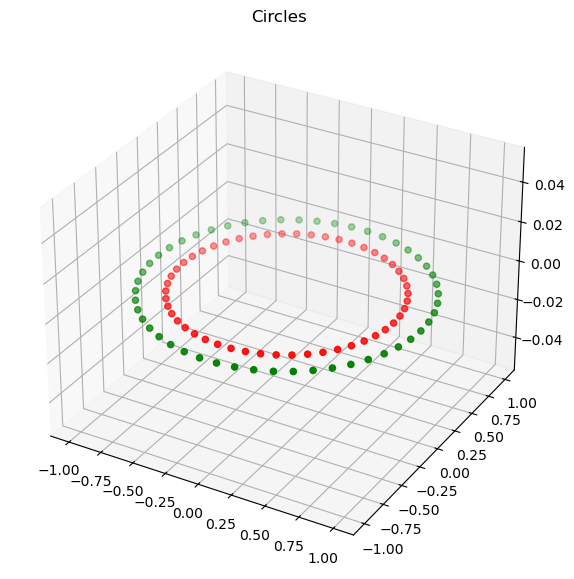

In [9]:
### ANSWER ###
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:,0], X[:,1], 0, c=clrs)
plt.title("Circles")

### 3.2 Trying to make the data linearly separable

Let's try to separate these circles of data using the existing values to compute $z$-values that would make it possible to separate the.

&#9989; **Do This:** Try to add a third dimension to the data, by calculated $z$-values based on the existing values. This is called a "transformation" of the data.

What might be a procedure to do that? You might have to think about this for a moment or perhaps poke around a bit on the internet. Do your best to come up with something that you think should work. 

Make a 3D plot of your transformed data.

In [ ]:
# put your code here


Text(0.5, 0.92, 'Circles')

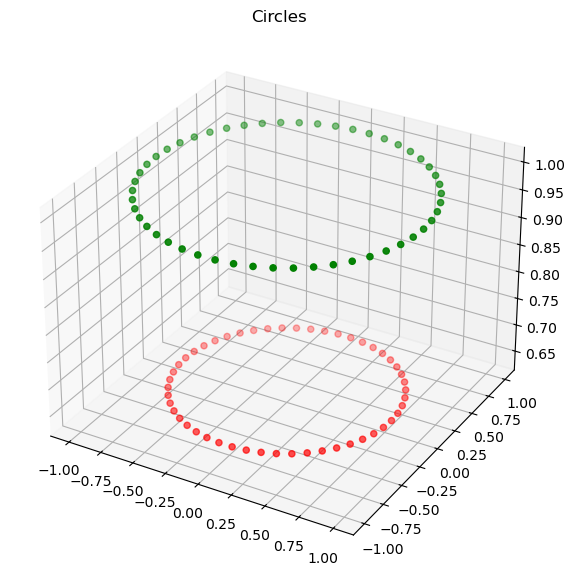

In [11]:
### ANSWER ###
z = X[:,0]**2 + X[:,1]**2
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:,0], X[:,1], z, c=clrs)
plt.title("Circles")

&#9989; **Question:** What transformation did you use to separate the data in the third, $z$ dimension? Do you feel you were successful in separating the data?

<font size=+3>&#9998;</font> Do this - Erase this and put your answer here.

---
## 4. Alternative Kernels for SVM

The linear kernel is one of a number of possible kernels that an SVM can use. One common choice for dealing with nonlinear data is the Radial Basis Function (RBF) Kernel. The video from the previous class assignment has a bit of information about this kernel.

&#9989; **Do This:** Review this section of the video for a conceptual description how the RBF works like a nearest neighbors model. Deeper, more technial details on the RBF are readily available online, but extend a bit beyond the scope of this course at the present time. Feel free to dig into them if you wish!

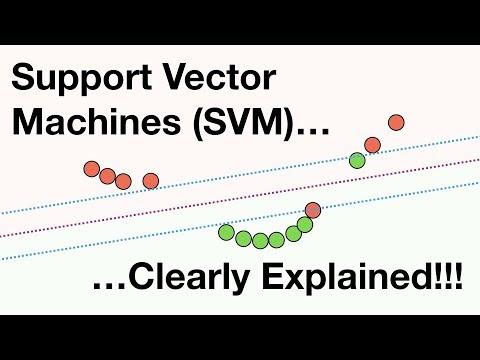

In [13]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=17, seconds=29).total_seconds())
YouTubeVideo("efR1C6CvhmE",width=800,height=450,start=start)

&#9989; **Question:** How does a the RBF work like a nearest-neighbors model?

<font size=+3>&#9998;</font> Do this - Erase this and put your answer here.

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. When we can't easily linearly separate classes in our data in its default form, what can we do with the data in order to find a linear decision boundary that *can* separate the data?

2. How does the RBF act similarly to the nearest-neighbor algorithm?

----
# Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2023 Department of Computational Mathematics, Science and Engineering at Michigan State University